<a href="https://www.kaggle.com/code/guilhermedemarchi/titanic-competition-v1?scriptVersionId=124445422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [9]:
train_df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived')

,Survived
Sex,
male,0.188908
female,0.742038


In [10]:
train_df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [11]:
train_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


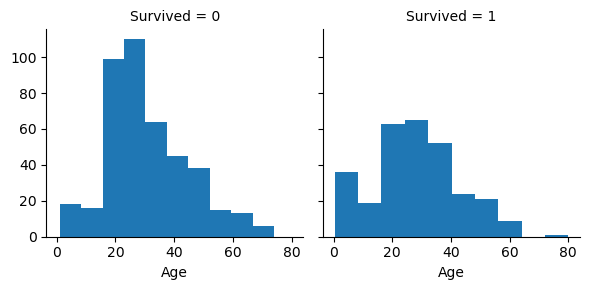

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age')

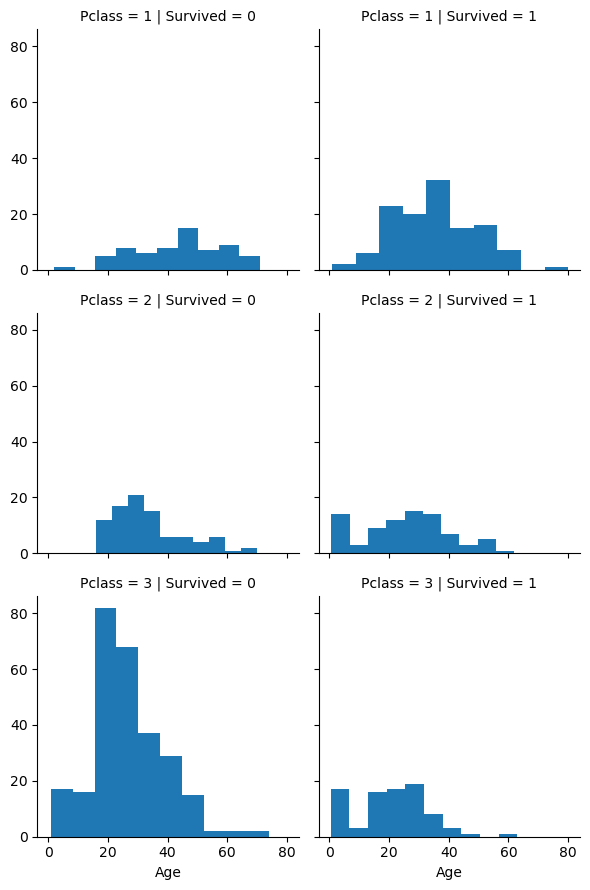

In [13]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


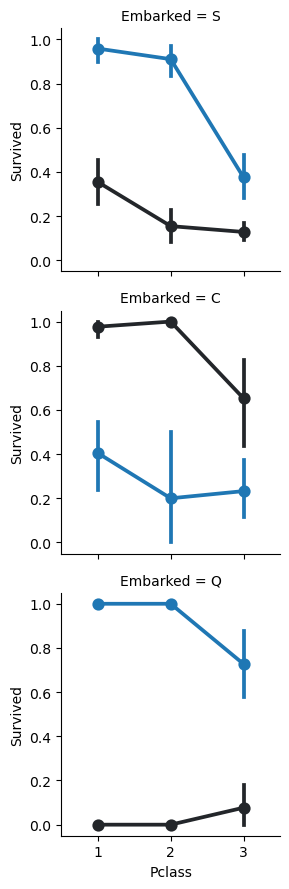

In [14]:
g = sns.FacetGrid(train_df, row='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


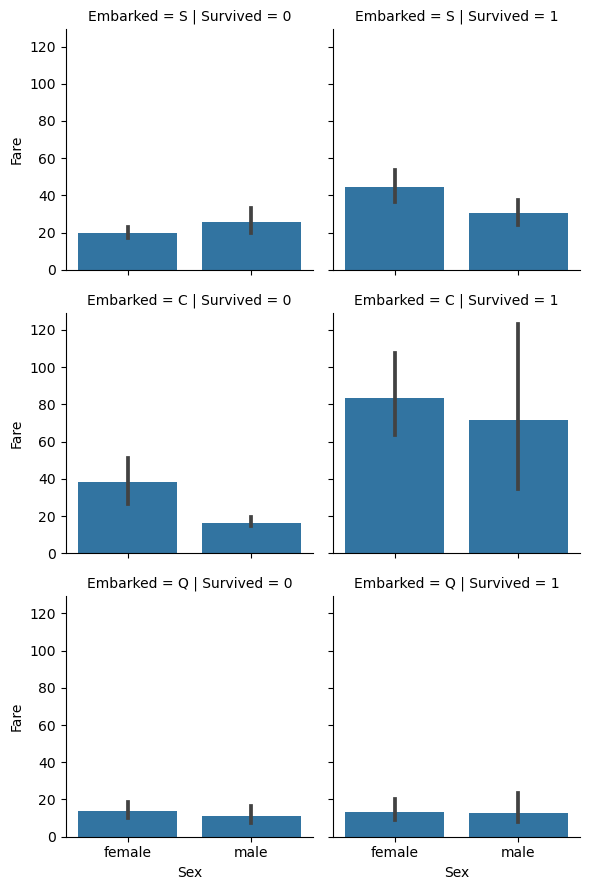

In [15]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')

In [16]:
def substrings_in_string(string, substrings):
    for s in substrings:
        if s in string:
            return s
    return string

#Turning cabin number into Deck
cabins = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'T': 6, 'G': 7, 'Unknown': 8}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].replace(np.nan, 'Unknown')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: substrings_in_string(x, cabins.keys()))
    
for dataset in combine:
    dataset['Deck'] = dataset['Deck'].map(cabins)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,8
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,8
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,4
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,8


In [17]:
train_df[['Deck', 'Survived']].groupby('Deck').mean().sort_values(by='Survived')

,Survived
Deck,
6,0.000000
8,0.299854
0,0.466667
7,0.500000
5,0.583333
2,0.593220
1,0.744681
3,0.757576
4,0.757576


In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
 
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [19]:
train_df[['Title', 'Survived']].groupby(['Title']).mean().sort_values(by='Survived')

,Survived
Title,
Mr,0.156673
Rare,0.347826
Master,0.575000
Miss,0.702703
Mrs,0.793651


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,8,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,8,1


In [22]:
train_df = train_df.drop(['PassengerId', 'Name'], axis=1)
# test_df = test_df.drop(['PassengerId', 'Name'], axis=1)
combine = [train_df, test_df]

In [23]:
train_df.shape, test_df.shape

((891, 10), (418, 11))

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [25]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22.0,1,0,7.2500,S,8,1
1,1,1,1,38.0,1,0,71.2833,C,2,3
2,1,3,1,26.0,0,0,7.9250,S,8,2
3,1,1,1,35.0,1,0,53.1000,S,2,3
4,0,3,0,35.0,0,0,8.0500,S,8,1


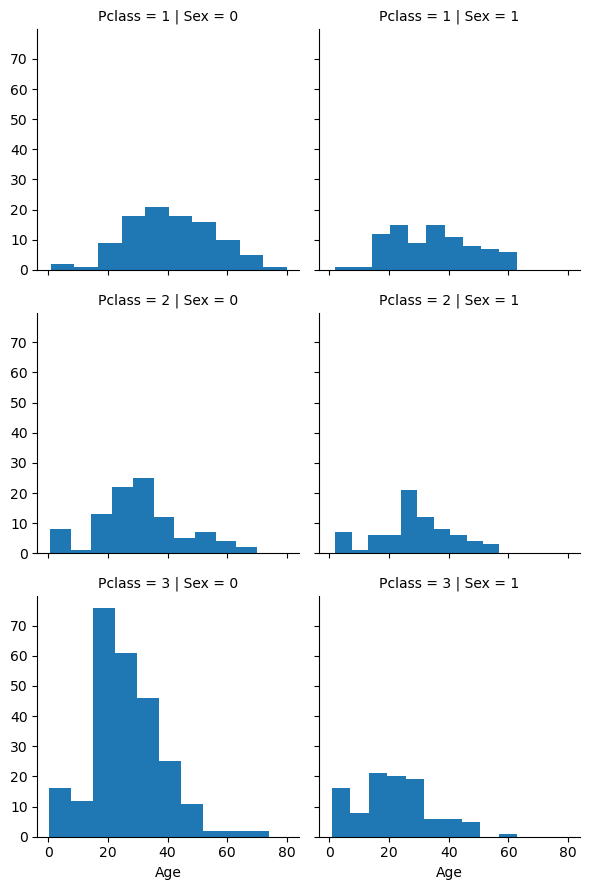

In [26]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex')
g.map(plt.hist, 'Age')

In [27]:
guess_ages = np.zeros((2, 3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            dataset.loc[
                (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 
                'Age',
            ] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7.2500,S,8,1
1,1,1,1,38,1,0,71.2833,C,2,3
2,1,3,1,26,0,0,7.9250,S,8,2
3,1,1,1,35,1,0,53.1000,S,2,3
4,0,3,0,35,0,0,8.0500,S,8,1


In [29]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='Survived')

,Survived
AgeBand,
"(64.0, 80.0]",0.090909
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(-0.08, 16.0]",0.550000


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,8,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,2,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,8,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,2,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,8,1,"(32.0, 48.0]"


In [31]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,1,1,0,7.2500,S,8,1
1,1,1,1,2,1,0,71.2833,C,2,3
2,1,3,1,1,0,0,7.9250,S,8,2
3,1,1,1,2,1,0,53.1000,S,2,3
4,0,3,0,2,0,0,8.0500,S,8,1


In [32]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset.Age * dataset.Pclass

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived')

,Survived
FamilySize,
8,0.000000
11,0.000000
6,0.136364
5,0.200000
1,0.303538
7,0.333333
2,0.552795
3,0.578431
4,0.724138


In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby('IsAlone').mean().sort_values(by='Survived')

,Survived
IsAlone,
1,0.303538
0,0.505650


In [35]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Age*Pclass,IsAlone
0,0,3,0,1,7.2500,S,8,1,3,0
1,1,1,1,2,71.2833,C,2,3,2,0
2,1,3,1,1,7.9250,S,8,2,3,1
3,1,1,1,2,53.1000,S,2,3,2,0
4,0,3,0,2,8.0500,S,8,1,6,1


In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Age*Pclass,IsAlone
0,0,3,0,1,7.2500,0,8,1,3,0
1,1,1,1,2,71.2833,1,2,3,2,0
2,1,3,1,1,7.9250,0,8,2,3,1
3,1,1,1,2,53.1000,0,2,3,2,0
4,0,3,0,2,8.0500,0,8,1,6,1


In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand')

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,Age*Pclass,IsAlone
0,0,3,0,1,0,0,8,1,3,0
1,1,1,1,2,3,1,2,3,2,0
2,1,3,1,1,1,0,8,2,3,1
3,1,1,1,2,3,0,2,3,2,0
4,0,3,0,2,1,0,8,1,6,1
5,0,3,0,1,1,2,8,1,3,1
6,0,1,0,3,3,0,4,1,3,1
7,0,3,0,0,2,0,8,4,0,0
8,1,3,1,1,1,0,8,3,3,0
9,1,2,1,0,2,1,8,3,0,0


In [40]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Deck,Title,Age*Pclass,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,2,8,1,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,0,0,8,3,6,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,1,2,8,1,6,1
3,895,3,"Wirz, Mr. Albert",0,1,1,0,8,1,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,0,8,3,3,0
5,897,3,"Svensson, Mr. Johan Cervin",0,0,1,0,8,1,0,1
6,898,3,"Connolly, Miss. Kate",1,1,0,2,8,2,3,1
7,899,2,"Caldwell, Mr. Albert Francis",0,1,2,0,8,1,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,1,8,3,3,1
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,8,1,3,0


In [41]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop(['PassengerId', 'Name'], axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.797979797979798

In [43]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation')

,Feature,Correlation
0,Pclass,-0.575731
7,Age*Pclass,-0.295304
3,Fare,-0.103467
5,Deck,-0.094379
8,IsAlone,0.143036
4,Embarked,0.233701
2,Age,0.268293
6,Title,0.415092
1,Sex,2.202850


In [44]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.7822671156004489

In [45]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)
knc.score(X_train, Y_train)

0.8619528619528619

In [46]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
gnb.score(X_train, Y_train)

0.7396184062850729

In [47]:
p = Perceptron()
p.fit(X_train, Y_train)
Y_pred = p.predict(X_test)
p.score(X_train, Y_train)

0.7934904601571269

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
dtc.score(X_train, Y_train)

0.8933782267115601

In [49]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc.score(X_train, Y_train)

0.8933782267115601

In [50]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred
})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [51]:
submission.to_csv('submission.csv', index=False)